In [1]:
import pandas as pd

In [25]:
df=pd.read_excel("steak-comments.xlsx")

In [26]:
df.head()

,comments,date
0,买了好几天了，刚开始连续吃了好几次，一下子吃光了5块西冷牛排和1块眼肉的，觉得挺好的，今天又...,2019-12-10 17:29:00
1,疫情期间哪都去不了，只能待在家里想着法儿做各种美食。期间学会了凉皮、蛋糕、油泼辣子面等等各种...,2019-11-16 17:58:00
2,第一次买这个牛排，顺丰物流。已经吃的差不多了，个人感觉还不错，先好评～买了两种牛排，每个里面...,2019-10-09 19:41:00
3,千万不要在这家店卖，血泪教训，快递扔自提店不提示也没短信，催了三次还要自己联系，第二天从自提...,2019-09-15 10:03:00
4,非常失望，再盒马买过这个牌子还不行，网上入手5眼肉5西冷，先不说是不是原切。一家人烤了三块，...,2019-08-28 11:21:00


In [27]:
text = df.comments.iloc[0]

In [28]:
from snownlp import SnowNLP
s = SnowNLP(text)

In [29]:
s.sentiments

0.03222216989778204

In [30]:
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

In [31]:
df["sentiment"] = df.comments.apply(get_sentiment_cn)

In [32]:
df.head()

,comments,date,sentiment
0,买了好几天了，刚开始连续吃了好几次，一下子吃光了5块西冷牛排和1块眼肉的，觉得挺好的，今天又...,2019-12-10 17:29:00,3.222217e-02
1,疫情期间哪都去不了，只能待在家里想着法儿做各种美食。期间学会了凉皮、蛋糕、油泼辣子面等等各种...,2019-11-16 17:58:00,9.999025e-01
2,第一次买这个牛排，顺丰物流。已经吃的差不多了，个人感觉还不错，先好评～买了两种牛排，每个里面...,2019-10-09 19:41:00,9.999971e-01
3,千万不要在这家店卖，血泪教训，快递扔自提店不提示也没短信，催了三次还要自己联系，第二天从自提...,2019-09-15 10:03:00,3.184519e-11
4,非常失望，再盒马买过这个牌子还不行，网上入手5眼肉5西冷，先不说是不是原切。一家人烤了三块，...,2019-08-28 11:21:00,1.679860e-09


In [33]:
df.sentiment.mean()

0.4685911828498071

In [34]:
df.sentiment.median()

0.2792188443798662

In [37]:
%pylab inline
from ggplot import *

Populating the interactive namespace from numpy and matplotlib


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['xlim', 'legend', 'ylim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


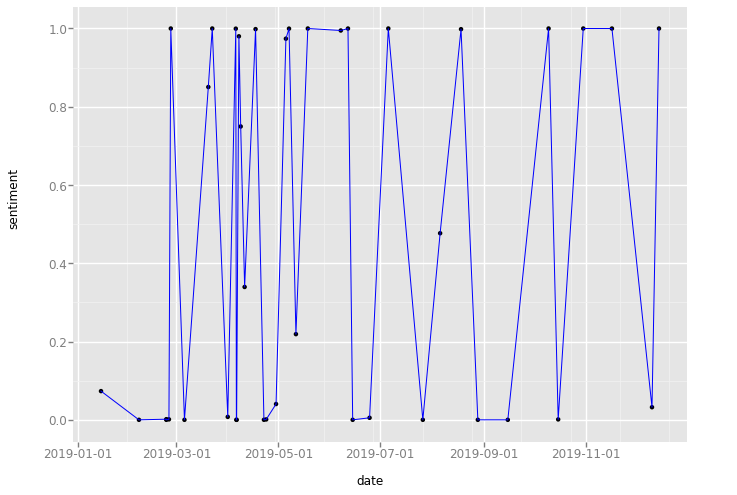

<ggplot: (304890317)>

In [38]:
ggplot(aes(x="date", y="sentiment"), data=df) + geom_point() + geom_line(color = 'blue') + scale_x_date(labels = date_format("%Y-%m-%d"))

In [22]:
df.sort_values(['sentiment'])[:1]

,comments,date,sentiment
3,千万不要在这家店卖，血泪教训，快递扔自提店不提示也没短信，催了三次还要自己联系，第二天从自提...,2019-09-15 10:03:00,3.184519e-11


In [23]:
print(df.sort_values(['sentiment']).iloc[0].comments)

千万不要在这家店卖，血泪教训，快递扔自提店不提示也没短信，催了三次还要自己联系，第二天从自提店拿来已经都化了！关键关键，可悲的是，大希地的客服说没问题的，没有味道就没事，让我们放心吃，气的我使劲喷，连续几天联系客服不理要么客服不在我们会核实，每天搪塞你。这种商店迟早完蛋。看着吧，这评论大希地肯定会回复抱歉呀不好意思呀我们会下次会努力的
